In [83]:
from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import SquaredErrorCalculator
from HW2.optimization import RMSPropOptimization, NesterovOptimization
from HW2.regression_generator import generate_regression
from HW2.sgd import minibatch_gd, normalised_mini
from HW2.visualization import visualize_regression_point, visualize_line
import numpy as np

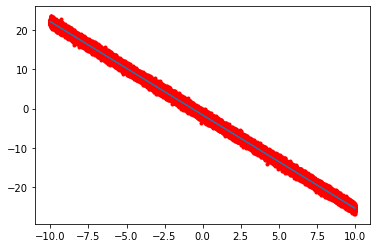

In [91]:
f, points = generate_regression(point_count=100000, scale=4, y_scale=0.5)

visualize_regression_point(f, points)

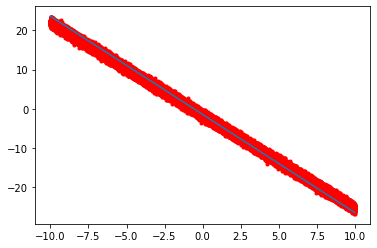

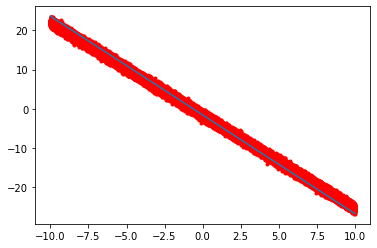

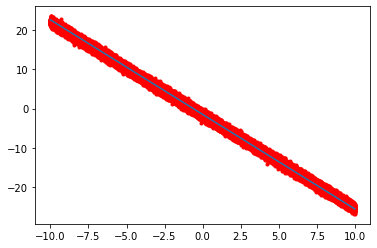

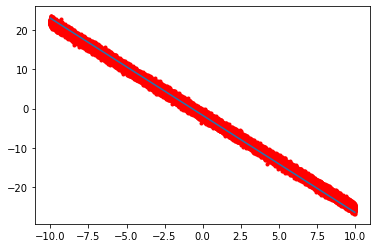

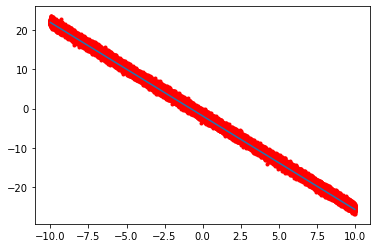

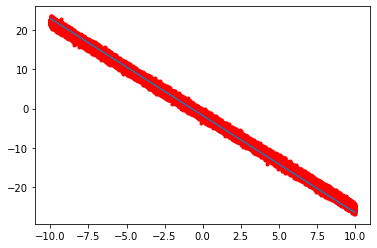

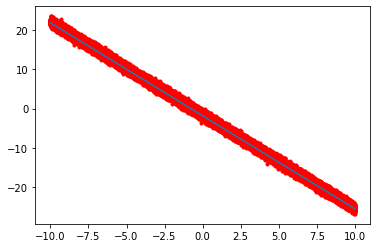

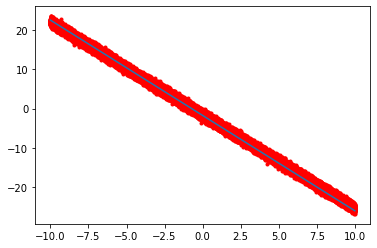

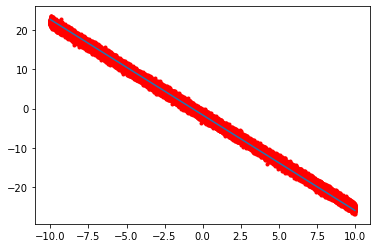

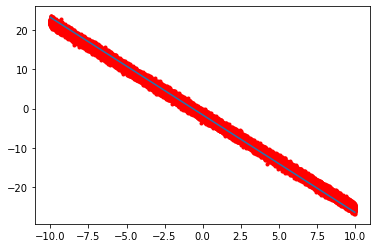

In [92]:
storage = BenchmarkStorage()
index = storage.add_benchmark_config()
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)


In [93]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', False, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5612144000000001
	Mean memory:0.0B
	Mean SMAPE value:0.05313256340056891



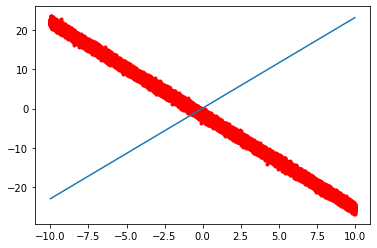

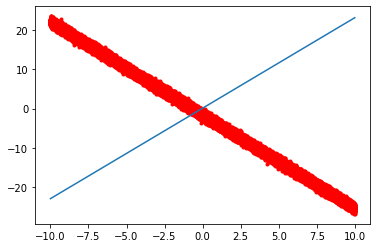

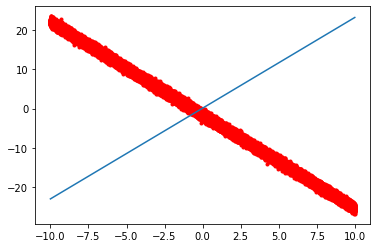

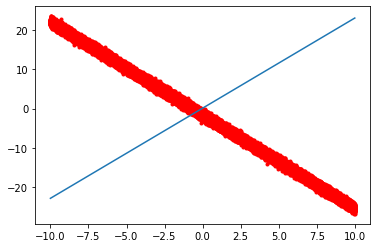

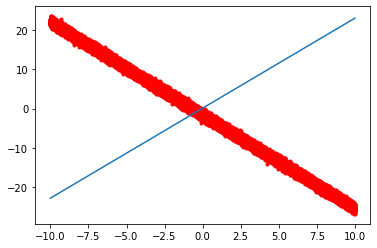

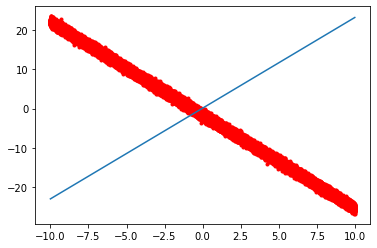

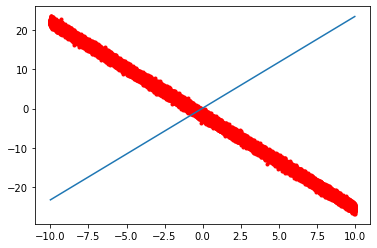

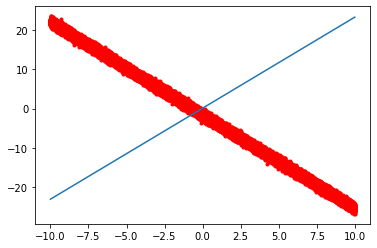

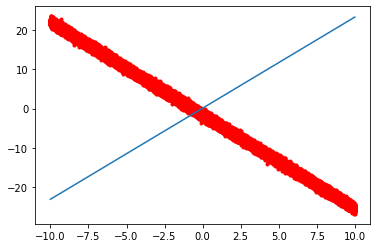

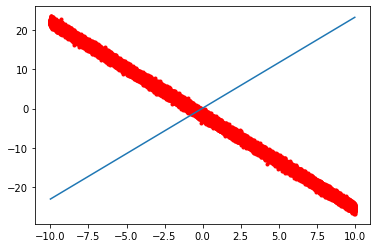

In [94]:
index = storage.add_benchmark_config(normalized=True)
for _ in range(10):
    ab, meta = normalised_mini(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)

In [95]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', True, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5868042
	Mean memory:0.0B
	Mean SMAPE value:0.974301435291016



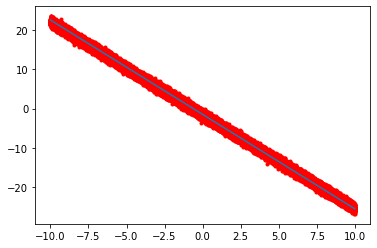

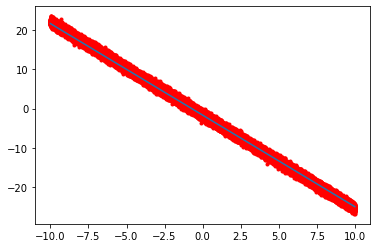

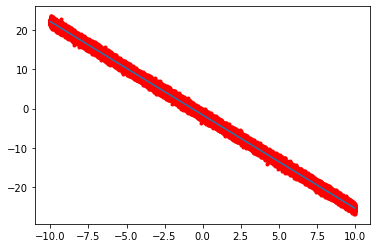

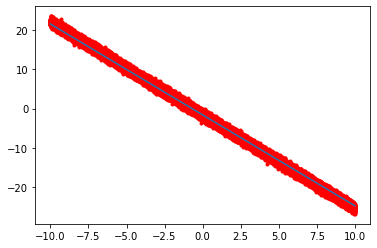

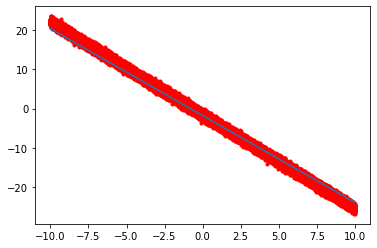

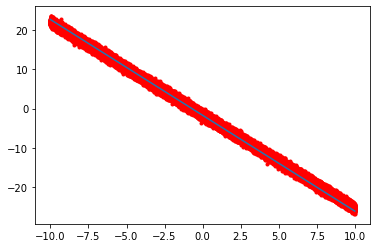

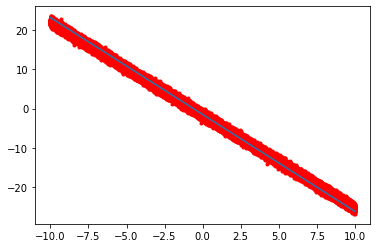

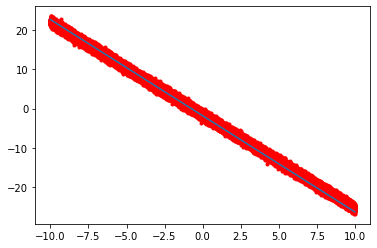

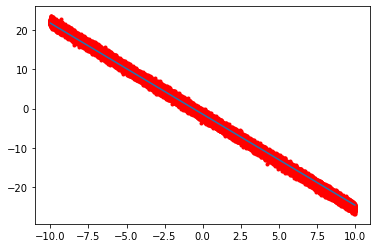

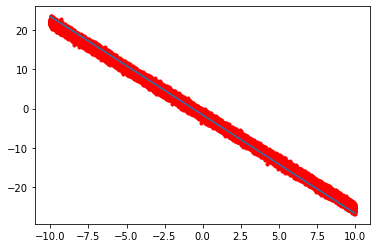

Benchmark results for config <('svd', False, <HW2.optimization.NesterovOptimization object at 0x0000015346FB4040>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5854140000000001
	Mean memory:0.0B
	Mean SMAPE value:0.052650232681234366



In [96]:
index = storage.add_benchmark_config(optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))

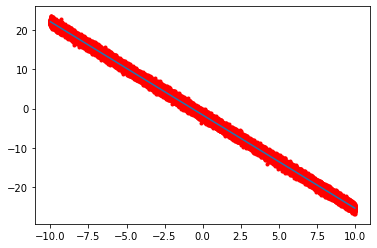

0.046432935603271226


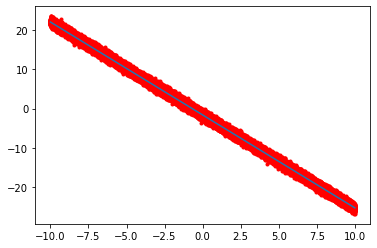

0.04650075030604077


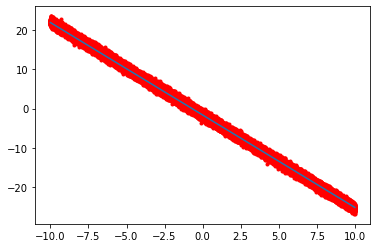

0.04684632565825319


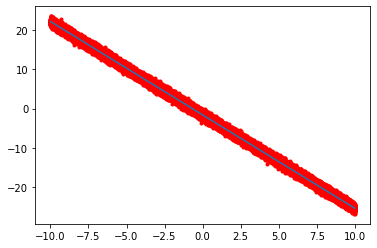

0.04646048751865621


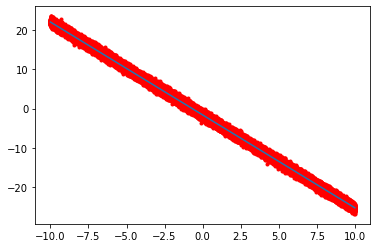

0.04651359414453622


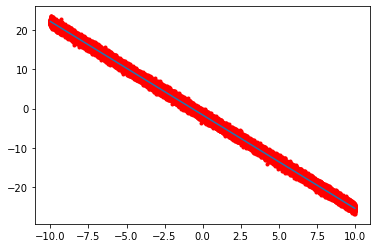

0.04644719567084304


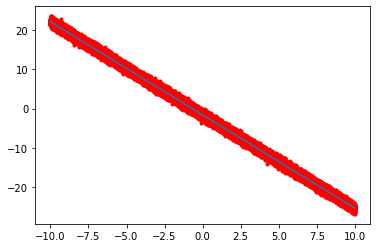

0.046446386663289575


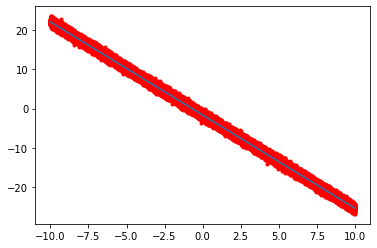

0.04644375486920439


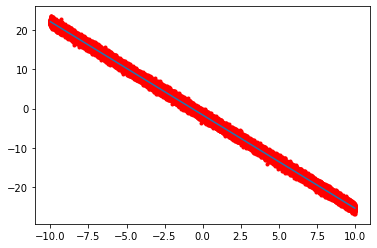

0.04643183942892736


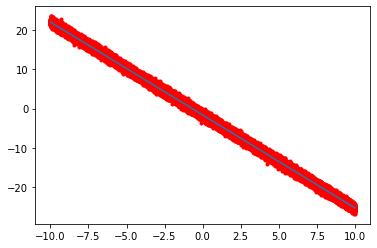

0.04649526602465022
Benchmark results for config <('mini200', False, <HW2.optimization.NesterovOptimization object at 0x0000015346C3DA00>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:33.2082215
	Mean memory:0.0B
	Mean SMAPE value:0.046501853588767225



In [99]:
index = storage.add_benchmark_config(batch_size='mini200', optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points, batch_size=200)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
    print(meta['smape'])
print(storage.get_benchmark_results(index))